In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import ttest_ind
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from statsmodels.tools.eval_measures import mse, rmse
from wordcloud import WordCloud
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVC
from sklearn import tree
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn import neighbors
from IPython.display import Image


import pydotplus
from sklearn import ensemble

import warnings

%matplotlib inline
sns.set()

warnings.filterwarnings('ignore')
import time

In [59]:
boston_df = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv')

In [60]:
df_boston = boston_df

In [61]:
#examine the data frame

print(
    df_boston.head(),
    df_boston.info(),
    df_boston.describe()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB
     10k                name  division    25k gender  age  official bib  \
0  17.37  Yamamoto, H

NTS: Drop 'state' and 'ctz' and 'name', probably ignore 'city', 'bib', 'genderdiv' and maybe 'division'; delete the one NaN entry from city. Convert all possible columns to numeric.

In [62]:
df_boston['5k']=pd.to_numeric(df_boston['5k'], errors='coerce')
df_boston['10k']=pd.to_numeric(df_boston['10k'], errors='coerce')
df_boston['20k']=pd.to_numeric(df_boston['20k'], errors='coerce')
df_boston['25k']=pd.to_numeric(df_boston['25k'], errors='coerce')
df_boston['30k']=pd.to_numeric(df_boston['30k'], errors='coerce')
df_boston['35k']=pd.to_numeric(df_boston['35k'], errors='coerce')
df_boston['40k']=pd.to_numeric(df_boston['40k'], errors='coerce')
df_boston['half']=pd.to_numeric(df_boston['half'], errors='coerce')

In [63]:
missing_values_ratios = (df_boston.isnull().sum()/df_boston.isnull().count())
missing_values_ratios.sort_values(ascending=False).head()

ctz      0.961106
state    0.080540
25k      0.006753
half     0.002251
5k       0.001626
dtype: float64

In [64]:
df_boston=df_boston.drop(['ctz', 'state'], axis=1)

In [65]:
missing_values_ratios = (df_boston.isnull().sum()/df_boston.isnull().count())
missing_values_ratios.sort_values(ascending=False).head()

25k     0.006753
half    0.002251
5k      0.001626
20k     0.001595
10k     0.001563
dtype: float64

In [66]:
df_boston=df_boston.dropna()

In [67]:
#examine the data frame

print(
    df_boston.head(),
    df_boston.info(),
    df_boston.describe()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31648 entries, 0 to 31983
Data columns (total 19 columns):
10k          31648 non-null float64
name         31648 non-null object
division     31648 non-null int64
25k          31648 non-null float64
gender       31648 non-null object
age          31648 non-null int64
official     31648 non-null float64
bib          31648 non-null object
genderdiv    31648 non-null int64
35k          31648 non-null float64
overall      31648 non-null int64
pace         31648 non-null float64
30k          31648 non-null float64
5k           31648 non-null float64
half         31648 non-null float64
20k          31648 non-null float64
country      31648 non-null object
city         31648 non-null object
40k          31648 non-null float64
dtypes: float64(10), int64(4), object(5)
memory usage: 4.8+ MB
     10k                name  division    25k gender  age  official bib  \
0  17.37  Yamamoto, Hiroyuki         8  47.67      M   47     85.25  W1   
1  32.5

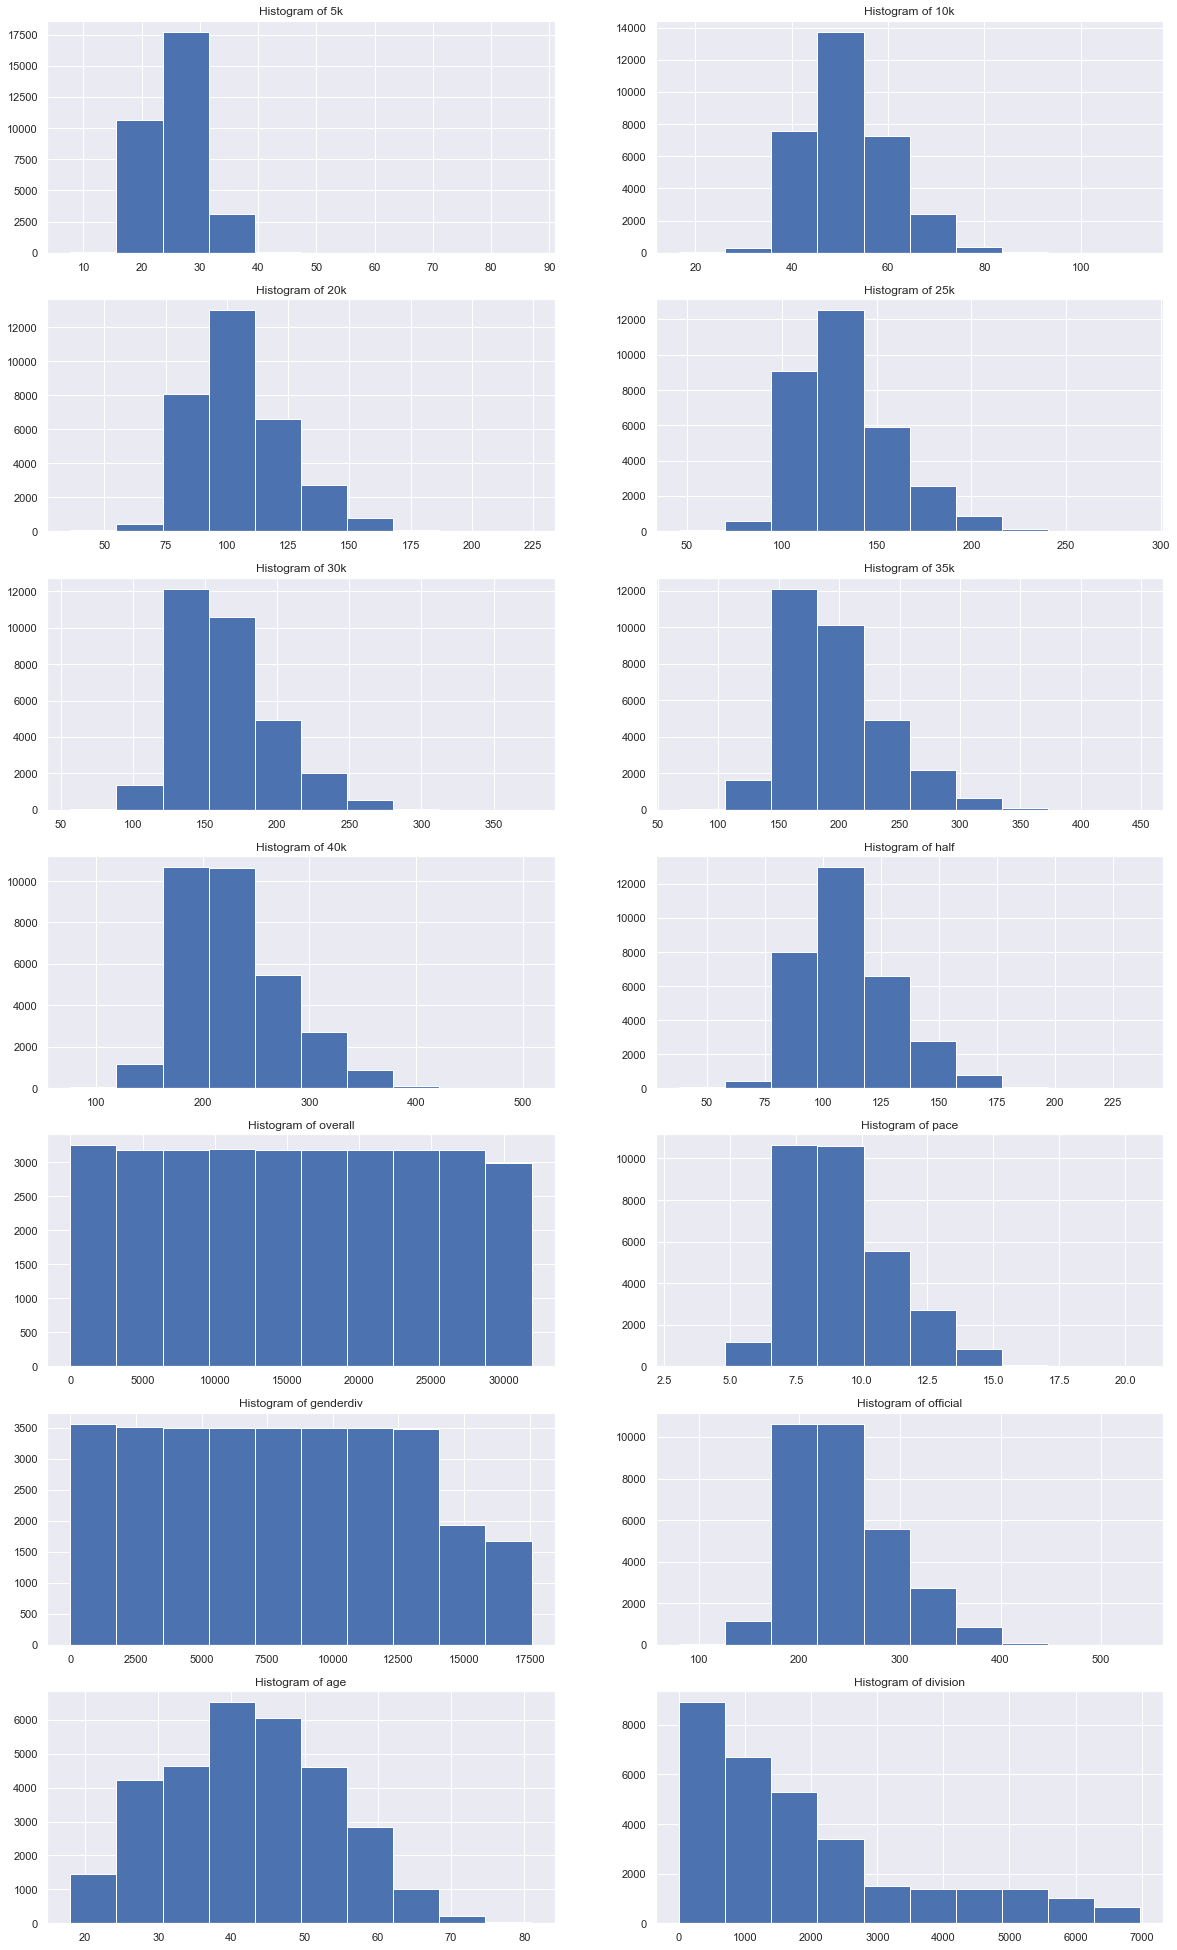

In [78]:
plt.figure(figsize=(20,35))
           
plt.subplot(7,2,1)
plt.hist(df_boston['5k'])
plt.title("Histogram of {}".format("5k"))

plt.subplot(7,2,2)
plt.hist(df_boston['10k'])
plt.title("Histogram of {}".format("10k"))

plt.subplot(7,2,3)
plt.hist(df_boston['20k'])
plt.title("Histogram of {}".format("20k"))

plt.subplot(7,2,4)
plt.hist(df_boston['25k'])
plt.title("Histogram of {}".format("25k"))

plt.subplot(7,2,5)
plt.hist(df_boston['30k'])
plt.title("Histogram of {}".format("30k"))

plt.subplot(7,2,6)
plt.hist(df_boston['35k'])
plt.title("Histogram of {}".format("35k"))

plt.subplot(7,2,7)
plt.hist(df_boston['40k'])
plt.title("Histogram of {}".format("40k"))

plt.subplot(7,2,8)
plt.hist(df_boston['half'])
plt.title("Histogram of {}".format("half"))

plt.subplot(7,2,9)
plt.hist(df_boston['overall'])
plt.title("Histogram of {}".format("overall"))

plt.subplot(7,2,10)
plt.hist(df_boston['pace'])
plt.title("Histogram of {}".format("pace"))

plt.subplot(7,2,11)
plt.hist(df_boston['genderdiv'])
plt.title("Histogram of {}".format("genderdiv"))

plt.subplot(7,2,12)
plt.hist(df_boston['official'])
plt.title("Histogram of {}".format("official"))

plt.subplot(7,2,13)
plt.hist(df_boston['age'])
plt.title("Histogram of {}".format("age"))

plt.subplot(7,2,14)
plt.hist(df_boston['division'])
plt.title("Histogram of {}".format("division"))
plt.show()


In [74]:
df_boston['gender'].value_counts()

M    17484
F    14164
Name: gender, dtype: int64

In [75]:
gender_bool = []

for idx, val in enumerate(df_boston['gender']):
    if val == 'F':
        gender_bool.append(1)
    else:
        gender_bool.append(0)
        
df_boston['gender_bool'] = gender_bool

In [76]:
df_boston['gender_bool'].value_counts()

0    17484
1    14164
Name: gender_bool, dtype: int64

In [97]:
X = df_boston[['5k', '10k', '20k', '25k', '30k', '35k', '40k', 
              'half', 'pace', 'official', 'age', 'division'
             ]]
y = df_boston['gender_bool']

In [98]:
X_norm = normalize(X)

In [112]:
#setting up parameters for GridSearchCV(X)... the plan is PCA(GridSearchCV(X))

n_comps = np.arange(0, 13)
param_grid_pca = [{'pca__n_components':n_comps}]
pipe_tree_pca = make_pipeline(PCA())

In [113]:
gs_pca = GridSearchCV(pipe_tree_pca, param_grid=param_grid_pca, cv=10)

In [116]:
gs_pca.fit(X_norm,y)
print(gs_pca.best_params_)

{'pca__n_components': 12}


In [117]:
#using the results of GridSearchCV to perform PCA

sklearn_pca = PCA(n_components=12)  
X_pca = sklearn_pca.fit_transform(X_norm)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA:\n',
    sklearn_pca.explained_variance_ratio_
)

#X_pca is now our PCA engineered feature set.

The percentage of total variance in the dataset explained by each component from Sklearn PCA:
 [9.61348991e-01 3.74067044e-02 6.07719138e-04 5.66313399e-04
 4.75550857e-05 1.07083614e-05 5.32058209e-06 3.78946954e-06
 2.14071799e-06 5.97007347e-07 1.60383108e-07 3.67118754e-10]


In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    y,
    test_size=0.9,
    random_state=42)

In [126]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=2

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)


print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

Comparing the assigned categories to the ones in the data:
col_0           0    1
gender_bool           
0            1484  279
1            1157  244
